In [35]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.Collecting sklearn


You should consider upgrading via the 'C:\Users\zihad\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [25]:

# Importing the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
names = ['pregnency', 'glucose', 'BP','skin','insulin','BMI','pedigree','age','class']
df=pd.read_csv("pima-indians-diabetes.csv",names=names)
df.head()

,pregnency,glucose,BP,skin,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnency  768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   BP         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
(768, 9)
        pregnency     glucose          BP        skin     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000  

In [28]:
df.groupby('class').size()

class
0    500
1    268
dtype: int64

In [29]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

<AxesSubplot:>

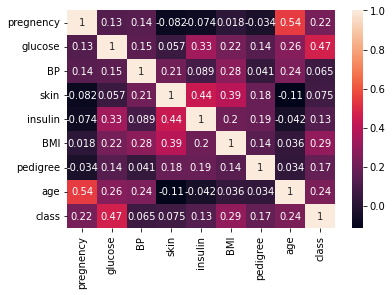

In [30]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
sns.pairplot(df)

# Preprocessing

In [32]:
x=df.drop('class',axis=1)
y=df['class']

In [38]:
from sklearn.preprocessing import StandardScaler

X_scaled=StandardScaler().fit_transform(x)
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [40]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [41]:
df.head()

,pregnency,glucose,BP,skin,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test =tts(X_scaled,y,stratify=y,random_state=8)

In [44]:
X_train.shape

(576, 8)

In [45]:
y_train.value_counts()

0    375
1    201
Name: class, dtype: int64

In [46]:
201/375

0.536

In [47]:
y_test.value_counts()

0    125
1     67
Name: class, dtype: int64

In [49]:
67/125 #ratio of y_train and Y_test output value is same for stratify parameter.

0.536

# Train using stand alone model

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
scores

array([0.7012987 , 0.67532468, 0.67532468, 0.75816993, 0.7254902 ])

In [50]:
scores.mean()

0.7071216365334012

# Train using Bagging

In [56]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

bag_model=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=8 )
bag_model.fit(X_train,y_train)
bag_model.oob_score_

0.7777777777777778

In [52]:
bag_model.score(X_test,y_test)

0.7083333333333334

In [54]:
scores=cross_val_score(bag_model,x,y,cv=5)
scores

array([0.72077922, 0.73376623, 0.75324675, 0.83006536, 0.74509804])

In [55]:
scores.mean()

0.7565911212970037

# Train using Random Forest

In [57]:
scores=cross_val_score(RandomForestClassifier(n_estimators=100),x,y,cv=5)
scores

array([0.74025974, 0.72727273, 0.77272727, 0.83006536, 0.75816993])

In [58]:
scores.mean()

0.7656990068754775